In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
FILE_PATH = "Veri-Seti.xlsx"
df = pd.read_excel(FILE_PATH)

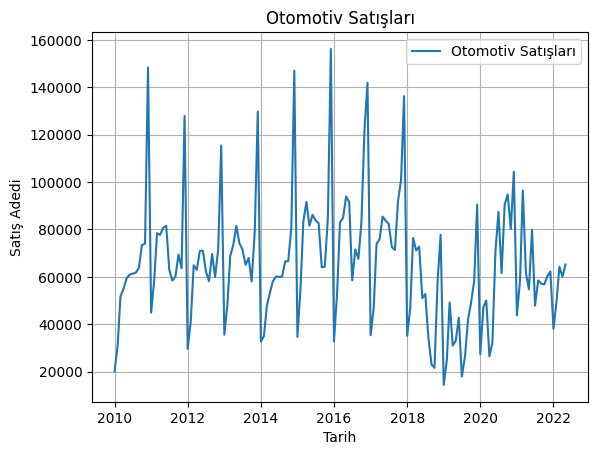

In [ ]:
plt.plot(df['Date'], df["Otomotiv Satis"], label='Otomotiv Satışları')
plt.title('Otomotiv Satışları')
plt.xlabel('Tarih')
plt.ylabel('Satış Adedi')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
df = df.drop(columns=['OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok'])
df = df.rename(columns={'Date': 'ds', 'Otomotiv Satis': 'y'})

In [ ]:
df_future = df[df['ds'] >= '2022-06-01']
df= df[df['ds'] < '2022-06-01']

In [ ]:
df_train = df.iloc[:-12]
df_test  = df.iloc[-12:]

print("Eğitim seti boyutu:", df_train.shape)
print("Test seti boyutu:", df_test.shape)

Eğitim seti boyutu: (137, 2)
Test seti boyutu: (12, 2)


In [ ]:
from prophet import Prophet
model = Prophet()
model.fit(df_train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpovkpqh2x/_jhynhxn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpovkpqh2x/ad_mgvlh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63222', 'data', 'file=/tmp/tmpovkpqh2x/_jhynhxn.json', 'init=/tmp/tmpovkpqh2x/ad_mgvlh.json', 'output', 'file=/tmp/tmpovkpqh2x/prophet_modelr6ojz4tr/prophet_model-20250915113123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:31:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast = model.predict(df_test)

In [ ]:
y_pred = forecast['yhat'].values
y_true= df_test['y'].values

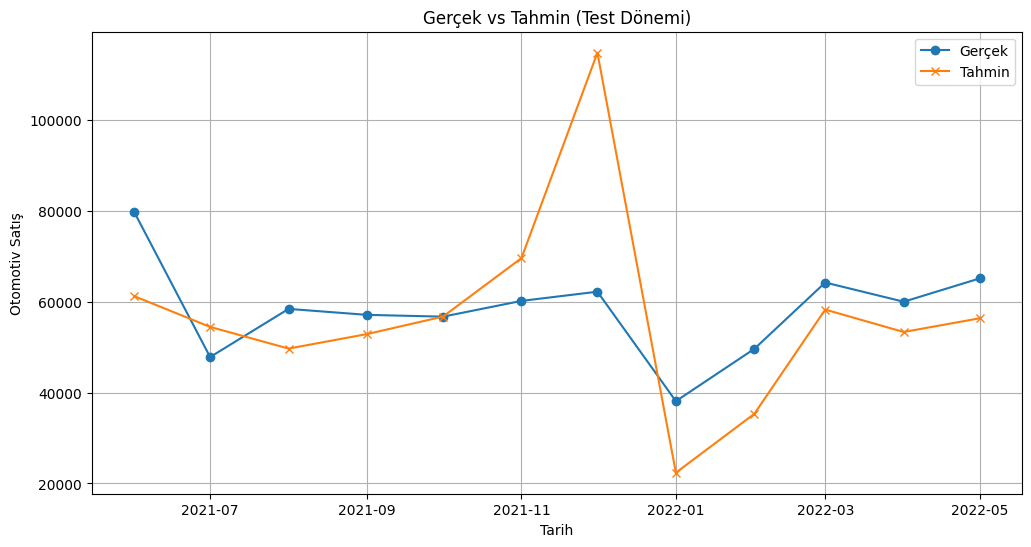

MAE:  12,644
RMSE: 18,150


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
plt.figure(figsize=(12, 6))
plt.plot(df_test['ds'], y_true, label="Gerçek", marker='o')
plt.plot(df_test['ds'], y_pred, label="Tahmin", marker='x')
plt.title("Gerçek vs Tahmin (Test Dönemi)")
plt.xlabel("Tarih")
plt.ylabel("Otomotiv Satış")
plt.legend()
plt.grid(True)
plt.show()

# --- Doğruluk Skorları ---
r2   = r2_score(y_true, y_pred)
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))

print(f"MAE:  {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpovkpqh2x/tbeq3x18.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpovkpqh2x/n679wwrn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97324', 'data', 'file=/tmp/tmpovkpqh2x/tbeq3x18.json', 'init=/tmp/tmpovkpqh2x/n679wwrn.json', 'output', 'file=/tmp/tmpovkpqh2x/prophet_modelf2v642ar/prophet_model-20250915113124.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:31:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:31:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


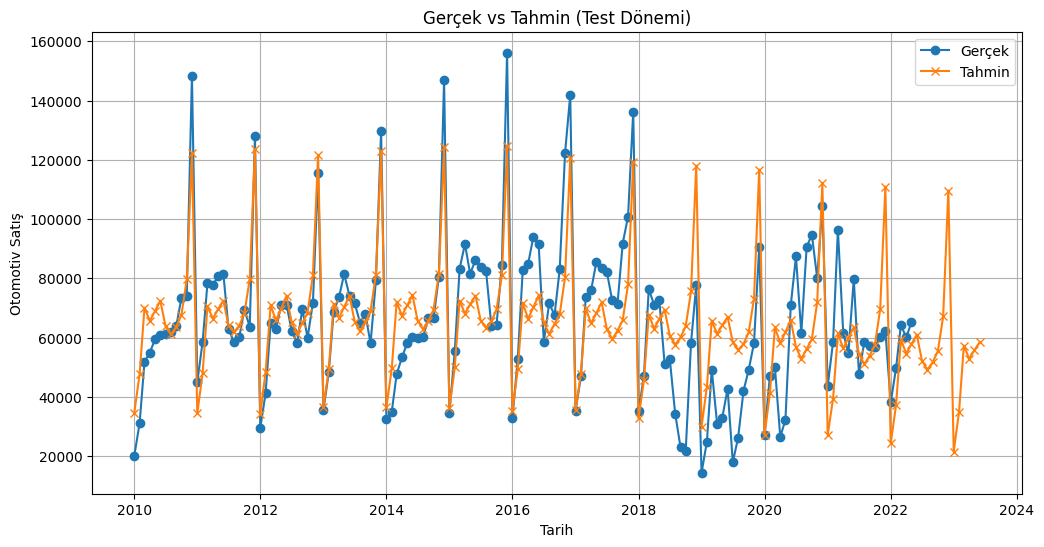

In [ ]:

df = pd.read_excel(FILE_PATH)
df = df.drop(columns=['OTV Orani', 'Faiz', 'EUR/TL', 'Kredi Stok'])
df = df.rename(columns={'Date': 'ds', 'Otomotiv Satis': 'y'})
model = Prophet()
model.fit(df)
forecast = model.predict(df)
y_pred = forecast['yhat'].values
y_true= df['y'].values
plt.figure(figsize=(12, 6))
plt.plot(df["ds"], y_true, label="Gerçek", marker='o')
plt.plot(df["ds"], y_pred, label="Tahmin", marker='x')
plt.title("Gerçek vs Tahmin (Test Dönemi)")
plt.xlabel("Tarih")
plt.ylabel("Otomotiv Satış")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from prophet.serialize import model_to_json, model_from_json
import json

# Save the model to a JSON file
with open('serialized_model.json', 'w') as fout:
    json.dump(model_to_json(model), fout)

